##==================================================================##
##        File: passivation_I-cell_plots.ipynb
##      Author: GOTTFRID OLSSON 
##     Created: 2024-04-24
##     Updated: 2024-06-11
##       About: Plots passivation data for the I-cell.
##==================================================================##

In [1]:
# LIBRARIES #
%matplotlib inline
import matplotlib
import numpy as np
import CSV_handler as CSV
import plot_functions as f
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from scipy.optimize import curve_fit
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset 


In [2]:
# PLOT SETTINGS #

fig_width_cm  = 16 #assumes A4-paper with margins=2.5cm on both right and left side
fig_height_cm = 9

font_size_axis   = 13
font_size_tick   = 11
font_size_legend = 9

grid_major = False
grid_minor = False
legend_on  = True

f.set_LaTeX_and_CMU(True) #must run before plotting
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')

three_grayscale_colors = ['#000000', '#595959', '#B2B2B2'] # with 35%-point increase in "value" (in HSV) 
five_grayscale_colors  = ['#000000', '#333333', '#666666', '#999999', '#cccccc'] #with 30% saturation difference = good contrast
four_grayscale_colors  = ['#000000', '#3F3F3F', '#7F7F7F', '#BFBFBF'] # with 25%-point increase in "value" (in HSV) 
markers      = ['^',    'o',    's',   'X',     'D',   '.']
marker_sizes = [3.3,    3.3,    3.3,    3.6,    3,      3.3]

standard_text_box_settings = dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor=five_grayscale_colors[4]) #edgecolor, facecolor, alpha as to match legend 

DONE: set_LaTeX_and_CMU: True


In [67]:
# FUNCTIONS #

def shift_df_column_to_start_at_zero(df_column):
    df_column_shift_value = df_column[0]
    return df_column - df_column_shift_value


def try_get_column_from_df(df, column_name_string):
    try:
        column = df.loc[:,column_name_string]
    except:
        print("EXCEPTION: No column with name {column_name_string} (instead returns value None).")
        column = None
    return column


def get_t_V_I_error_from_Biologic_file_root_path(root_path, shift_t_to_zero=False):
    df = CSV.read(root_path, delimiter='\t') #tab separated from Biologic

    t = try_get_column_from_df(df, "time/s")
    if shift_t_to_zero:
        try:
            t = shift_df_column_to_start_at_zero(t)
        except:
            print("EXCEPTION: Could not perform shift_df_column_to_start_at_zero().")

    V = try_get_column_from_df(df, "Ewe/V")
    I = try_get_column_from_df(df, "I/mA")
    e = try_get_column_from_df(df, "error")

    return [t, V, I, e]
    

def calculate_deposited_amount_mAhcm2_from_t_I(t, I):
    # assumes data in units 'time/s' and 'current/mA' as well as an electrode area of 0.196 cm2 (Li, 5 mm diameter)
    A = 0.196       # cm2
    t_hour = t/3600 # h (hour)
    J = np.abs(I)/A # mA/cm2; abs to avoid negative capacity
    C = J*t_hour    # mAh/cm2
    return C    


def get_current_date_and_time_as_ISO8601_string():
    import datetime
    date_and_time = datetime.datetime.now().strftime("%Y%m%dT%H%M%S")
    return date_and_time


def ansats_passivationCurrent_vs_time(x, a):
    # ansats is: y = a*x^b (y = current, x = time, a is a constant)
    return a/x


In [68]:
# Root paths #
data_root_path = "C:\\SUMMER-JOB-2024-MATERIALS-PHYSICS\\EXPERIMENTAL\\DATA\\Cycling data Master thesis\\"
I_cell_path = "I-cell\\"
I_cell_root_path = data_root_path + I_cell_path

#electrochemical_figures_export_root_path = 'C:\\MASTER-THESIS\\FIGURES\\Electrochemical-plots\\'

In [69]:
# Paths for I-cell passivation data #

# each file has columns:  time/s	Ewe/V	I/mA	error	
A4_01_20240424  = I_cell_root_path + "2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_02_MB_C11.txt"
A4_02_20240425  = I_cell_root_path + "2024-04-25_JP_sample-A4-02-extra_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_low-OCV_Deltax110.2mm_02_MB_C11.txt"
A5_01_20240424  = I_cell_root_path + "2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C10.txt"
A55_01_20240424 = I_cell_root_path + "2024-04-29_JP-measurements_sample-A5.5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax109.9mm_02_MB_C03.txt"
A6_01_20240424  = I_cell_root_path + "2024-04-24_JP-measurements_sample-A6-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C11.txt"
A6_02_20240426  = I_cell_root_path + "2024-04-26_JP-measurements_sample-A6-02_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.1mm_02_MB_C02.txt"
A6_03_20240426  = I_cell_root_path + "2024-04-26_JP-measurements_sample-A6-03_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.002_added-OCV-0.1s_Deltax110.2mm_02_MB_C01.txt"
# these were built 2024-05-26 and have rested in a plastic bag (each) until 2024-06-11 when they were passivated and deposited onto
month_old_01_A5 = "C:\\SUMMER-JOB-2024-MATERIALS-PHYSICS\\EXPERIMENTAL\\DATA\\month-old_I-cell_passivation\\2024-06-11_Exploration-measurement-moth-old-I-cells\\" + "2024-06-11_month-old-I-cell_built-2024-05-16-old-OCV-2.2V_deltaX-110.0mm_02_MB_C04.txt"
month_old_02_A5 = "C:\\SUMMER-JOB-2024-MATERIALS-PHYSICS\\EXPERIMENTAL\\DATA\\month-old_I-cell_passivation\\2024-06-11_Exploration-measurement-moth-old-I-cells\\" + "2024-06-11_month-old-I-cell_built-2024-05-16-old-OCV-2.5V_deltaX-110.3mm_02_MB_C02.txt"


A4_01   = get_t_V_I_error_from_Biologic_file_root_path(A4_01_20240424,  shift_t_to_zero=True)
A4_02   = get_t_V_I_error_from_Biologic_file_root_path(A4_02_20240425,  shift_t_to_zero=True)
A5_01   = get_t_V_I_error_from_Biologic_file_root_path(A5_01_20240424,  shift_t_to_zero=True)
A55_01  = get_t_V_I_error_from_Biologic_file_root_path(A55_01_20240424, shift_t_to_zero=True)
A6_01   = get_t_V_I_error_from_Biologic_file_root_path(A6_01_20240424,  shift_t_to_zero=True)
A6_02   = get_t_V_I_error_from_Biologic_file_root_path(A6_02_20240426,  shift_t_to_zero=True)
A6_03   = get_t_V_I_error_from_Biologic_file_root_path(A6_03_20240426,  shift_t_to_zero=True)
month_old_01 = get_t_V_I_error_from_Biologic_file_root_path(month_old_01_A5,  shift_t_to_zero=True)
month_old_02 = get_t_V_I_error_from_Biologic_file_root_path(month_old_02_A5,  shift_t_to_zero=True)

DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Cycling data Master thesis\I-cell\2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_02_MB_C11.txt
DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Cycling data Master thesis\I-cell\2024-04-25_JP_sample-A4-02-extra_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_low-OCV_Deltax110.2mm_02_MB_C11.txt
DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Cycling data Master thesis\I-cell\2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C10.txt
DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Cycling data Master thesis\I-cell\2024-04-29_JP-measurements_sample-A5.5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-

In [87]:
x_data_to_fit = month_old_02[0][1:-1]/60 # /60 to go from second to minute
y_data_to_fit = np.abs(month_old_02[2][1:-1]*1000) #*1000 to go from mA to muA

fitted_parameters, _ = curve_fit(ansats_passivationCurrent_vs_time, x_data_to_fit, y_data_to_fit)
print(fitted_parameters)

[19.01675998]


Fit: y=a/x, where a=19.016759975415813
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: log on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: align_labels
DONE: set_layout_tight
DONE: set_title to: Passivation of Cu in the I-cell
DONE: export_figure_as_pdf: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\PYTHON\Plot I-cell data from Master thesis\Plots\I-cell_passivatoin-curves_20240612T093323.pdf


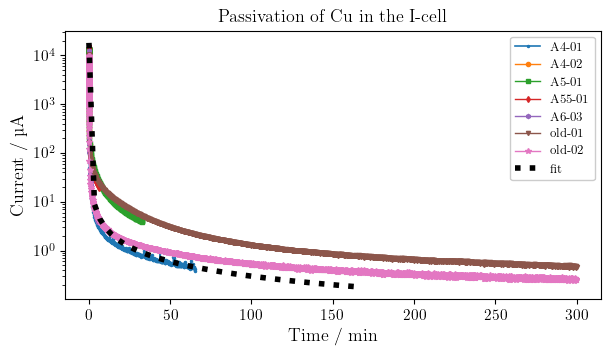

In [99]:
# PLOT PASSIVATION: I vs. t (I-cells) #
# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

current_multiplier = 1000 # mA-->muA in plot
time_divider = 60 # s --> minute in plot
# Plot data (axs.plot, .errorbar, .hist, ...) # SEIDEP_sigma_x_MB = [t, V, I, error]
axs.plot( A4_01[0][1:-1]/time_divider,   np.abs(A4_01[2][1:-1]*current_multiplier), linewidth=1.2, linestyle='-', label='A4-01',  marker='.',  markersize=3)#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot( A4_02[0][1:-1]/time_divider,   np.abs(A4_02[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='A4-02',  marker='o', markersize=3)#, color=five_grayscale_colors[1])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot( A5_01[0][1:-1]/time_divider,   np.abs(A5_01[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='A5-01',  marker='s', markersize=3)#, color=five_grayscale_colors[2])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot(A55_01[0][1:-1]/time_divider,  np.abs(A55_01[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='A55-01', marker='d', markersize=3)#, color=five_grayscale_colors[3])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
#axs.plot( A6_01[0][1:-1],   np.abs(A6_01[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='A6-01',  marker='^', markersize=3)#, color=five_grayscale_colors[4])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
#axs.plot( A6_02[0][1:-1],   np.abs(A6_02[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='A6-02',  marker='.', markersize=3)#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot( A6_03[0][1:-1]/time_divider,   np.abs(A6_03[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='A6-03',  marker='h', markersize=3)#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot( month_old_01[0][1:-1]/time_divider,np.abs(month_old_01[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='old-01',  marker='v', markersize=3)#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot( month_old_02[0][1:-1]/time_divider,np.abs(month_old_02[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='old-02',  marker='*', markersize=4)#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
x_linspace = np.linspace(0.1/60, 10000/60)
y_fit = ansats_passivationCurrent_vs_time(x_linspace, 30)#, fitted_parameters[1])
axs.plot(x_linspace, y_fit, linewidth=4, linestyle=':', label='fit', color='k')
print(f"Fit: y=a/x, where a={fitted_parameters[0]}")#, b={fitted_parameters[1]}")


# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='log', yScale_string='log')
f.set_axis_labels(  axs, x_label='Time / min', y_label='Current / \\textmu A')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
#f.set_axis_limits(  axs, xmin=0.06, xmax=3*10000, ymin=1*0.1, ymax=3*10000)
#f.set_axis_limits(  axs, xmin=0.01, xmax=10, ymin=1*0.1, ymax=3*10000)

#f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
#f.set_grid(         ax_inset, grid_major_on=True, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')
f.align_labels(fig)
f.set_layout_tight(fig)

f.set_title("Passivation of Cu in the I-cell")
#mark_inset(axs, ax_inset, loc1=2, loc2=1, facecolor="none", edgecolor="0.05", linewidth=0.95, zorder=101)# draw a bbox of the region of the inset axes in the parent axes and connecting lines between the bbox and the inset axes area

PDF_path_passivation_Icell= "C:\\SUMMER-JOB-2024-MATERIALS-PHYSICS\\PYTHON\\Plot I-cell data from Master thesis\\Plots\\"+ "I-cell_passivatoin-curves_" + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_passivation_Icell)
plt.show()